# Analyzing the scraped data
When scraping data from the internet, we often need to do some "sanity checks" to make sure that the collected data is what we expect it to be, because in scraping we are exposed to connection problems, bans from the host, and errors caused by the differences between the HTML structures of different web pages.

In this notebook, you are asked to plot some graphs to explore the data that you have collected and find the problems in it, if any.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Exploring the downloaded HTML files

### Task 1.1
In this task, you have to plot the distribution of the file sizes of the HTML pages that you have downloaded. Usually, all pages will have a similar size. If you notice that you have a number of files with a significantly different size than the majority of the files, then it may be a good idea to check these files and explore the reason behind this difference. For example, in our code we are saving empty HTML files if we face an error while downloading the web pages. Therefore, seeing a number of files with size zero in the histogram indicates that we have some HTML pages that were not downloaded.

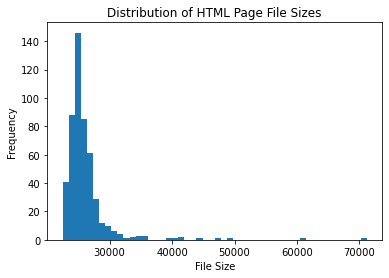

In [35]:
# Plot the distribution of the downloaded HTML file sizes
# WRITE YOUR CODE HERE
import os



# Set the directory where the HTML pages are stored
directory = 'C:/Users/Enes Şen/Desktop/CS210-HW2/CS210-HW2/data/raw_html'

# Get the file sizes of all HTML pages in the directory
file_sizes = [os.path.getsize(os.path.join(directory, f)) for f in os.listdir(directory) if f.endswith('.html')]

# Plot a histogram of the file sizes
plt.hist(file_sizes, bins=50)
plt.xlabel('File Size')
plt.ylabel('Frequency')
plt.title('Distribution of HTML Page File Sizes')


plt.savefig('figures/html_file_size.png')


### Task 1.2
Since the HTML file size is significantly affected by the images it contains, another way to explore the downloaded HTML files is by looking at the number of lines in each file. In this task, you need to plot a distribution of the number of lines in the downloaded HTML files.

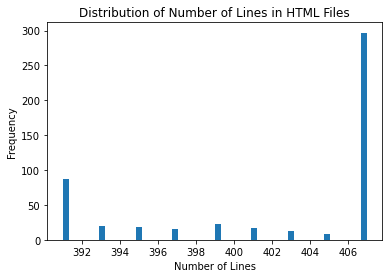

In [36]:
# Plot the distribution of line counts in the downloaded HTML files
# WRITE YOUR CODE HERE
import os


# Set the directory where the HTML pages are stored
directory = 'C:/Users/Enes Şen/Desktop/CS210-HW2/CS210-HW2/data/raw_html'

# Get the number of lines in each HTML file in the directory
num_lines = []
for f in os.listdir(directory):
    if f.endswith('.html'):
        with open(os.path.join(directory, f), 'r', encoding='utf-8') as file:
            num_lines.append(len(file.readlines()))

# Plot a histogram of the number of lines
plt.hist(num_lines, bins=50)
plt.xlabel('Number of Lines')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Lines in HTML Files')


# Save the final plot in figures/html_line_count.png using the code below
plt.savefig('figures/html_line_count.png')

## 2. Exploring the processed data

### Task 2.1
The first thing to check is if we have extracted information from all of the collected links or not. In this task, you need to compare the number of links that you have collected (in link_list.txt) to the number of parsed data dictionaries (in parsed_data.jsons) that you have created by parsing the downloaded HTML files.

In [27]:
# Compute the number of links in link_list.txt
# WRITE YOUR CODE HERE
import json
n_collected_links = 0



# Read the link_list.txt file and count the number of lines
with open("C:/Users/Enes Şen/Desktop/CS210-HW2/CS210-HW2/data/link_list.txt", 'r') as f:
    n_collected_links = len(f.readlines())


# Compute the number of the parsed data dictionaries in parsed_data.jsons
# WRITE YOUR CODE HERE

n_parsed_links = 0
with open("C:/Users/Enes Şen/Desktop/CS210-HW2/CS210-HW2/data/parsed_data.jsons", 'r') as f:
    n_parsed_links = sum(1 for line in f)




print(f"Number of collected links: {n_collected_links}")
print(f"Number of parsed links: {n_parsed_links}")

Number of collected links: 501
Number of parsed links: 500


### Task 2.2
In this task, you need to plot the distribution of line counts in the text content that you extracted from the HTML web pages. This will help point out some errors in content extraction, if any.

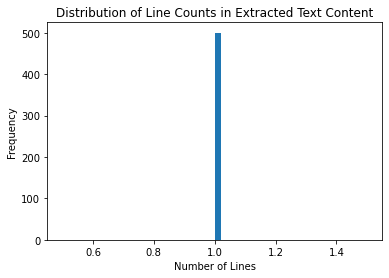

In [37]:
# Plot the distribution of line counts in the extracted text content
# WRITE YOUR CODE HERE
import json


# Read the parsed data from the parsed_data.jsons file
with open('C:/Users/Enes Şen/Desktop/CS210-HW2/CS210-HW2/data/parsed_data.jsons', 'r') as f:
    parsed_data = [json.loads(line) for line in f]

# Extract the text content from each parsed data dictionary and count the number of lines
line_counts = []
for data in parsed_data:
    lines = data.get('text', '').split('\n')
    line_counts.append(len(lines))

# Plot a histogram of the line counts
plt.hist(line_counts, bins=50)
plt.xlabel('Number of Lines')
plt.ylabel('Frequency')
plt.title('Distribution of Line Counts in Extracted Text Content')



# Save the final plot in figures/content_line_count.png using the code below
plt.savefig('figures/content_line_count.png')

### Task 2.3
In this task, you need to plot the distribution of the dates of the collected news articles.

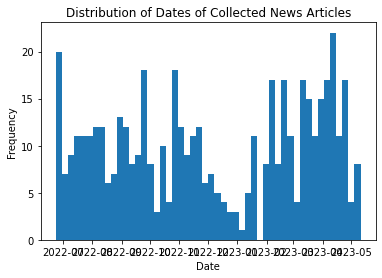

In [38]:
# Plot the distribution of dates from the extracted date information
# WRITE YOUR CODE HERE
import json

from datetime import datetime

# Read the parsed data from the parsed_data.jsons file
with open('C:/Users/Enes Şen/Desktop/CS210-HW2/CS210-HW2/data/parsed_data.jsons', 'r') as f:
    parsed_data = [json.loads(line) for line in f]

# Extract the date information from each parsed data dictionary
dates = []
for data in parsed_data:
    date_str = data.get('date', '')
    if date_str:
        date = datetime.strptime(date_str, '%Y-%m-%d')
        dates.append(date)

# Plot a histogram of the dates
plt.hist(dates, bins=50)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Dates of Collected News Articles')

# Save the final plot in figures/date_dist.png using the code below
plt.savefig('figures/date_dist.png')